In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MODELS = ['CNN', 'LSTM', 'DTW']
RESULTS_DIR = './results/'

In [3]:
results_df = pd.DataFrame()
for model_name in MODELS:
    df = pd.read_csv(os.path.join(RESULTS_DIR, f'{model_name}_clf_scores.csv'))
    df.index = [model_name]
    results_df = pd.concat([results_df, df])
results_df.style.background_gradient(cmap='Blues')

,accuracy,f1-score macro avg,f1-score weighted avg,precision macro avg,precision weighted avg,recall macro avg,recall weighted avg
CNN,0.679487,0.673175,0.664623,0.687500,0.685379,0.693750,0.679487
LSTM,0.717949,0.718998,0.718508,0.750645,0.750031,0.718750,0.717949
DTW,0.769231,0.770047,0.765284,0.796652,0.797573,0.780208,0.769231


<img src="./results/CNN_confusion_matrix.png" style="width:33%;"/><img src="./results/LSTM_confusion_matrix.png" style="width:33%;"/><img src="./results/DTW+KNN_confusion_matrix.png" style="width:33%;"/>

In [4]:
data = np.load('./dataset/dataset.npz')
X_test = data['X_test']
y_test = data['y_test']
ids_test = data['ids_test']
y_mapping = data['y_mapping']

<Axes: title={'center': 'Missclassification % per sample'}>

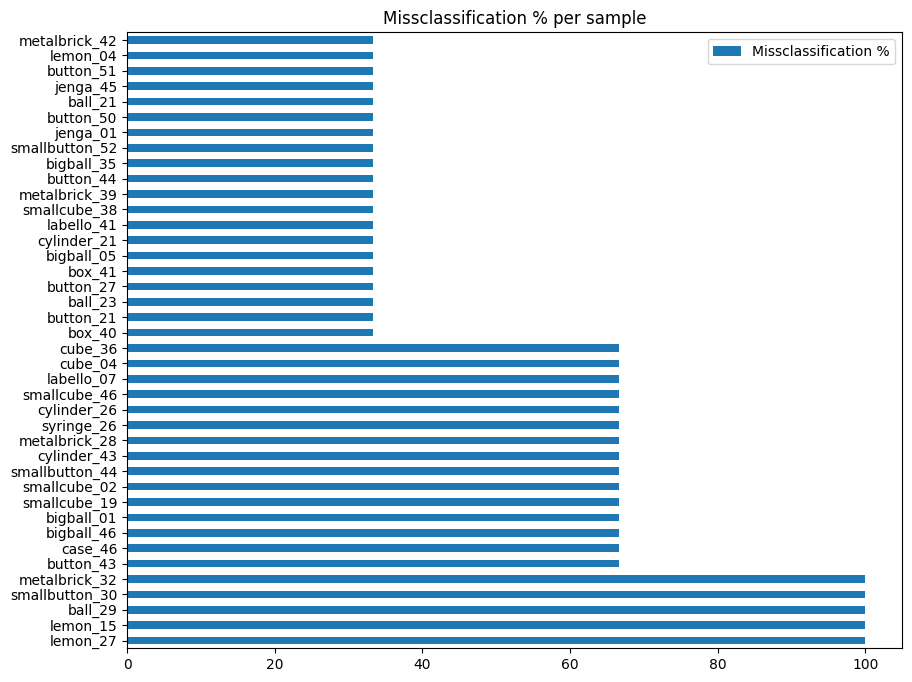

In [5]:
errors = np.zeros(y_test.shape[0])
for model_name in MODELS:
    model_preds = np.load(os.path.join(RESULTS_DIR, f'{model_name}_predictions.npy'))
    errors += (model_preds != y_test).astype(int)
errors /= len(MODELS)
errors = errors * 100
errors_df = pd.DataFrame(errors, columns=['Missclassification %'], index=ids_test)
errors_df.sort_values(by='Missclassification %', ascending=False, inplace=True)
errors_df[errors_df['Missclassification %']>0].plot.barh(figsize=(10, 8), title='Missclassification % per sample')

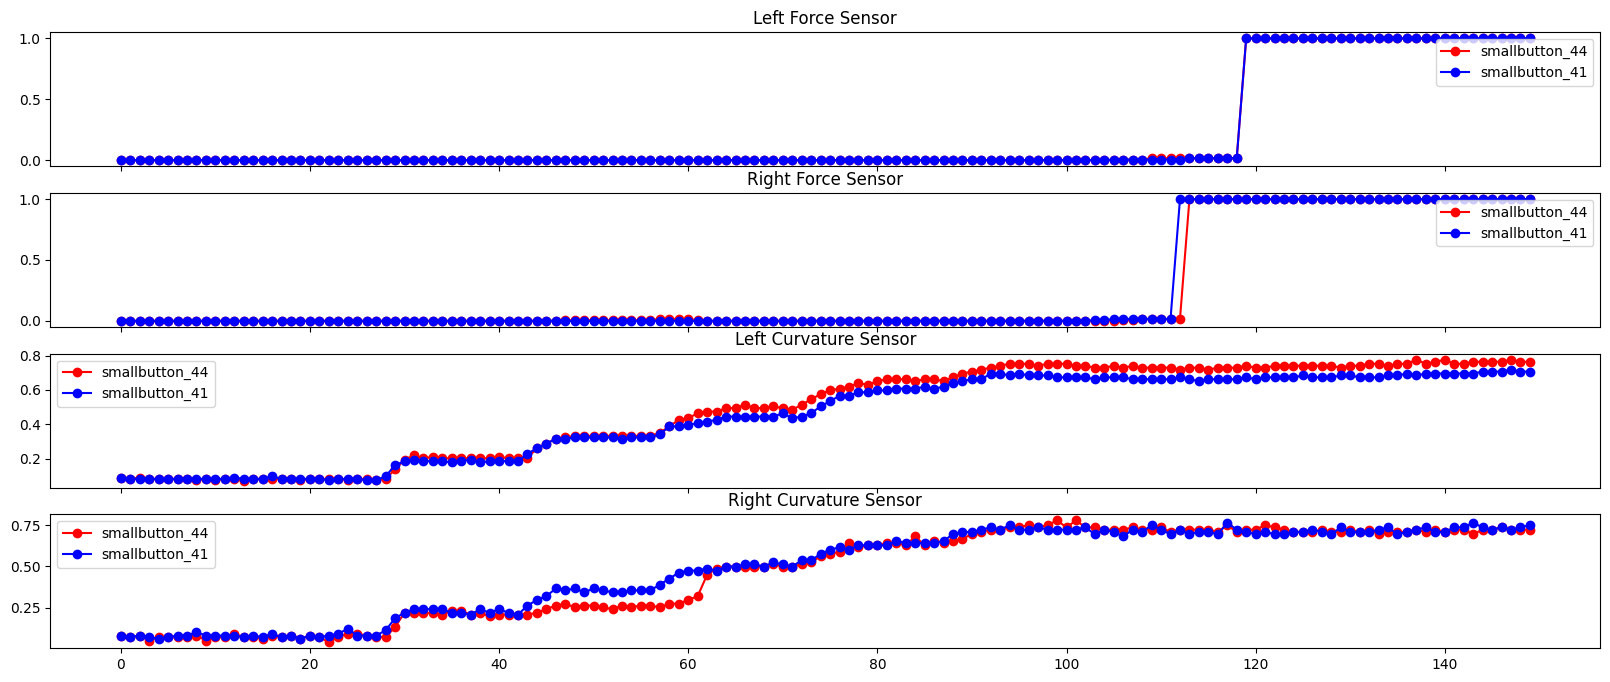

In [6]:
sample_id = 'smallbutton_44'
sample_index = np.where(ids_test == sample_id)[0][0]
sample_data = X_test[sample_index]


sample_id2 = 'smallbutton_41'
sample_index2 = np.where(ids_test == sample_id2)[0][0]
sample_data2 = X_test[sample_index2]

fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)
axs[0].plot(sample_data[:, 0], '-o', c='r', label=sample_id)
axs[0].plot(sample_data2[:, 0], '-o', c='b', label=sample_id2)
axs[0].legend()
axs[0].set_title(f'Left Force Sensor')
axs[1].plot(sample_data[:, 1], '-o', c='r', label=sample_id)
axs[1].plot(sample_data2[:, 1], '-o', c='b', label=sample_id2)
axs[1].legend()
axs[1].set_title(f'Right Force Sensor')
axs[2].plot(sample_data[:, 2], '-o', c='r', label=sample_id)
axs[2].plot(sample_data2[:, 2], '-o', c='b', label=sample_id2)
axs[2].legend()
axs[2].set_title(f'Left Curvature Sensor')
axs[3].plot(sample_data[:, 3], '-o', c='r', label=sample_id)
axs[3].plot(sample_data2[:, 3], '-o', c='b', label=sample_id2)
axs[3].legend()
axs[3].set_title(f'Right Curvature Sensor');